In [3]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=cbed12d00b306def951fb3a97b36af023fc8f393265e05160425e8047df0b128
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [104]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

import numpy as np
import pandas as pd
from pandas import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import seaborn as sns 
%matplotlib inline

from statsmodels.distributions.empirical_distribution import ECDF

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from fbprophet.make_holidays import get_holiday_names

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_plotly, plot_forecast_component_plotly

from fbprophet.diagnostics import performance_metrics, rmse
from google.colab import drive

In [105]:
df_AAPL = yf.download('AAPL', start = '2017-08-31', end = '2021-08-31')
df_AAPL.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


# 애플 역사적 종가 데이터

In [106]:
fig = px.line(df_AAPL, x = 'Date' ,y = 'Close', title = 'Apple Close Price History')
fig.show()


In [107]:
df_AAPL = df_AAPL[['Date','Close']] # prophet 모델 구성을 위한 데이터 재구성
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])
df_AAPL.columns = ['ds','y']

# prophet 모델로 애플 종가 예측

In [115]:
fig = plot_plotly(model, forecast,xlabel = 'Date', ylabel = 'Close Price', figsize=(1800, 1200))

fig.add_trace(go.Scatter(x = forecast['ds'],
                         y = forecast['yhat_upper'],
                         name = 'Predict_upper'))

fig.add_trace(go.Scatter(x = forecast['ds'],
                         y = forecast['yhat_lower'],
                         name = 'Predict_lower'))

fig.update_layout(title_text= "Apple Close Price Forecast",
                  title_font_color ='red')

py.iplot(fig)

NameError: ignored

### MSE 15.46

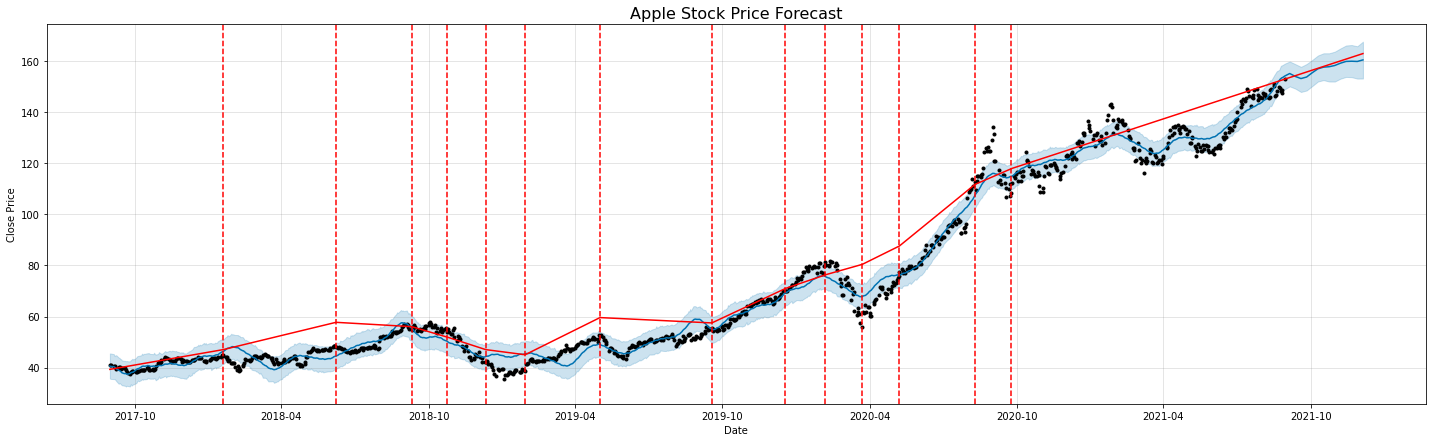

In [35]:
fig = model.plot(forecast, figsize=(20,6))
ax = fig.add_subplot(111)
ax.set_title('Apple Stock Price Forecast', fontsize=16)
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

model = Prophet(daily_seasonality = True)
model.fit(df_AAPL)
future = model.make_future_dataframe(periods=1 * 14, freq='W') # freq = 'D' 일때는 weekly-seasonality 를 제거
forecast = model.predict(future)
add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

In [111]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-31,39.322627,35.879869,45.259903,39.322627,39.322627,1.281836,1.281836,1.281836,-5.247051,-5.247051,-5.247051,-0.251045,-0.251045,-0.251045,6.779931,6.779931,6.779931,0.0,0.0,0.0,40.604462
1,2017-09-01,39.377550,35.727299,45.902235,39.377550,39.377550,1.088672,1.088672,1.088672,-5.247051,-5.247051,-5.247051,-0.398355,-0.398355,-0.398355,6.734078,6.734078,6.734078,0.0,0.0,0.0,40.466222
2,2017-09-05,39.597245,35.326456,45.021287,39.597245,39.597245,0.764631,0.764631,0.764631,-5.247051,-5.247051,-5.247051,-0.157001,-0.157001,-0.157001,6.168682,6.168682,6.168682,0.0,0.0,0.0,40.361875
3,2017-09-06,39.652168,35.267227,45.254645,39.652168,39.652168,0.498800,0.498800,0.498800,-5.247051,-5.247051,-5.247051,-0.201396,-0.201396,-0.201396,5.947246,5.947246,5.947246,0.0,0.0,0.0,40.150968
4,2017-09-07,39.707092,34.896033,45.025006,39.707092,39.707092,0.203856,0.203856,0.203856,-5.247051,-5.247051,-5.247051,-0.251045,-0.251045,-0.251045,5.701952,5.701952,5.701952,0.0,0.0,0.0,39.910948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,2021-11-07,160.102693,153.595373,164.844705,157.839272,163.073692,-0.887017,-0.887017,-0.887017,-5.247051,-5.247051,-5.247051,0.655881,0.655881,0.655881,3.704152,3.704152,3.704152,0.0,0.0,0.0,159.215675
1016,2021-11-14,160.824650,154.386061,165.928481,158.035192,164.345771,-0.909889,-0.909889,-0.909889,-5.247051,-5.247051,-5.247051,0.655881,0.655881,0.655881,3.681280,3.681280,3.681280,0.0,0.0,0.0,159.914762
1017,2021-11-21,161.546608,154.022054,166.443729,158.226620,165.696786,-1.554209,-1.554209,-1.554209,-5.247051,-5.247051,-5.247051,0.655881,0.655881,0.655881,3.036960,3.036960,3.036960,0.0,0.0,0.0,159.992399
1018,2021-11-28,162.268566,153.823644,167.039227,158.464903,167.020288,-2.366467,-2.366467,-2.366467,-5.247051,-5.247051,-5.247051,0.655881,0.655881,0.655881,2.224703,2.224703,2.224703,0.0,0.0,0.0,159.902099


In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-08-31,40.604462,35.504991,45.200745
1,2017-09-01,40.466222,35.827092,45.419653
2,2017-09-05,40.361875,35.333490,45.345444
3,2017-09-06,40.150968,35.435593,45.448744
4,2017-09-07,39.910948,35.053126,44.864160
...,...,...,...,...
1015,2021-11-07,159.215675,153.447982,164.873285
1016,2021-11-14,159.914762,153.463340,165.684607
1017,2021-11-21,159.992399,153.713478,166.261815
1018,2021-11-28,159.902099,153.244889,166.626203


In [17]:
chg_point = model.changepoints.reset_index()
deltas = model.params['delta'].mean(0)

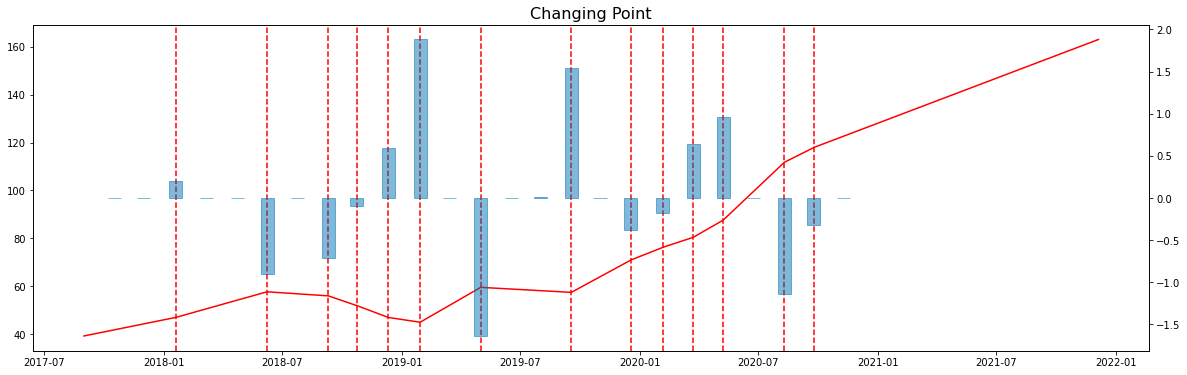

In [27]:
fig, ax = plt.subplots(1,1, figsize=(20,6))  
add_changepoints_to_plot(fig.gca(), model, forecast)
ax.set_title('Changing Point',fontsize = 16)
ax2 = ax.twinx()
ax2.bar(chg_point['ds'], deltas, facecolor='#0072B2', edgecolor='#0072B2',width= 20, alpha=0.5)


plt.show()

# Seasonality yearly(연간 계절성) 에 대한 해석
*    애플의 분기별 어닝데이터<br>
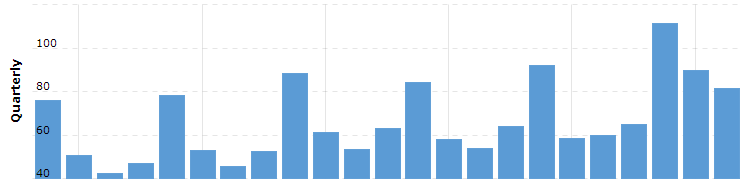

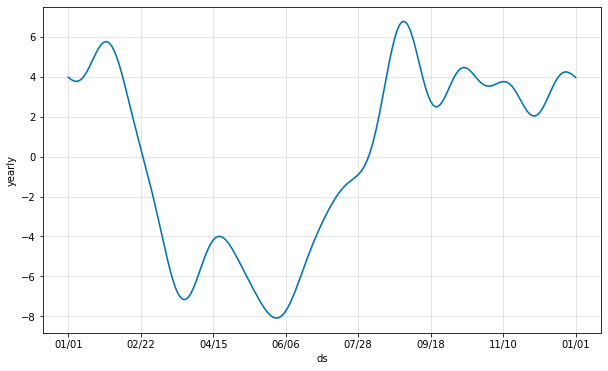

In [19]:
from fbprophet.plot import plot_seasonality , plot_forecast_component
plot_seasonality(model, name = 'yearly')
plt.show()

# Trend

NameError: ignored

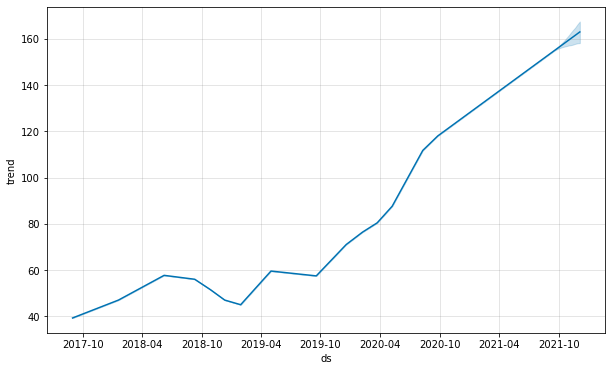

In [23]:
plot_forecast_component(model, forecast, name='trend')
ax.set_xlabel('date')
plt.show()

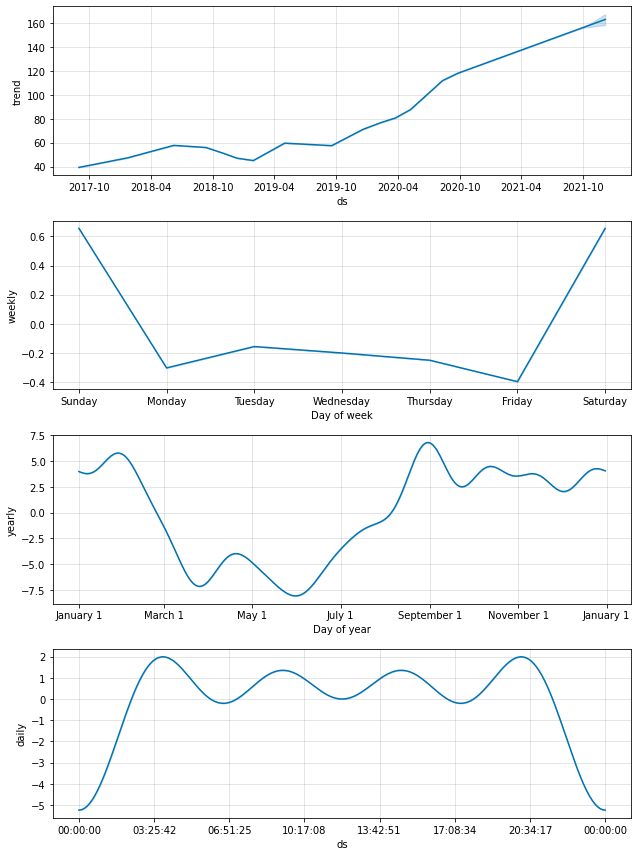

In [20]:
CompoPlot = model.plot_components(forecast)

In [34]:
plot_plotly(model, forecast, xlabel = 'Date', ylabel = 'Close Price')

## 모델의 예측이 얼마나 정확한지 알기 위해 MSE 를 구해보도록 하겠습니다.

In [ ]:
y_pred = forecast['yhat'][0:1006]
y_data = df_AAPL['y']

In [ ]:
print(y_pred.shape, y_data.shape)

(1006,) (1006,)


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_data,y_pred)

15.461392043549466